In [5]:
#第一步，由时间序列分析模型预测2023年7月1-7日
import pandas as pd

#z-score标准化用于后续相关性分析
# for i in range(len(name_pool)):
#     mean = sum_by_date_and_category[name_pool[i]].mean()
#     std = sum_by_date_and_category[name_pool[i]].std()
#     norm = (sum_by_date_and_category[name_pool[i]] - mean)/std
#     sum_by_date_and_category[name_pool[i]] = norm
    
# sum_by_date_and_category

cost_price = pd.read_excel('附件3.xlsx')
cost_price

,日期,单品编码,批发价格(元/千克)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [21]:
product_info = pd.read_excel('附件1.xlsx')
df = pd.merge(cost_price, product_info, on='单品编码')
df_price = df[['日期','批发价格(元/千克)','单品名称']]

#none列无意义，用于集计函数
df_price['none'] = [0 for i in range(len(df_price))]
cost_by_date_temp = df_price.groupby(['日期', '单品名称','批发价格(元/千克)'], as_index=False)['none'].sum()
cost_by_date = pd.pivot(cost_by_date_temp, index='日期', columns='单品名称')

cost_by_date = cost_by_date.drop('none', axis=1)
#将0级索引'批发价格(元/千克)'去除
cost_by_date.columns=cost_by_date.columns.droplevel(0)
#将nan值填充为0(因为有可能当天没有买这类蔬菜，而导致出现nan值)
# cost_by_date = cost_by_date.fillna(0)

cost_by_date

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_17788\2309280023.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,7.58,NaN,NaN,7.03,NaN,NaN,NaN,3.44,NaN,6.72,...,NaN,NaN,4.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,7.33,NaN,NaN,7.03,NaN,6.83,NaN,3.58,NaN,4.23,...,NaN,NaN,4.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,6.21,NaN,NaN,6.76,NaN,6.88,NaN,3.75,NaN,4.61,...,NaN,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04,7.43,NaN,NaN,6.56,NaN,7.21,NaN,3.75,NaN,5.77,...,NaN,NaN,4.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-05,8.35,NaN,NaN,6.56,NaN,7.03,NaN,3.75,NaN,5.77,...,NaN,NaN,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,12.05,11.92,NaN,4.08,NaN,NaN,NaN,4.48,2.79,5.76,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,NaN,12.53,NaN,4.08,NaN,NaN,NaN,2.66,2.80,5.74,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-28,NaN,12.84,NaN,4.08,NaN,NaN,NaN,NaN,2.86,NaN,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#拿第一列做尝试
temp = pd.DataFrame()
temp['ds'] = cost_by_date.index
temp['y'] = cost_by_date.iloc[:,0].values
temp

,ds,y
0,2020-07-01,7.58
1,2020-07-02,7.33
2,2020-07-03,6.21
3,2020-07-04,7.43
4,2020-07-05,8.35
...,...,...
1086,2023-06-26,12.05
1087,2023-06-27,NaN
1088,2023-06-28,NaN
1089,2023-06-29,8.92


In [8]:
#绘制趋势图
import plotly.express as px

fig = px.line(temp, x="ds", y="y")
fig.show()

In [9]:
from prophet import Prophet
import numpy
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.add_country_holidays(country_name="CN")
model.fit(temp)

23:21:03 - cmdstanpy - INFO - Chain [1] start processing
23:21:03 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
import datetime
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
pred = forecast[['ds', 'yhat']]
pred[(pred['ds'] >= datetime.datetime.strptime('2023-07-01','%Y-%m-%d')) & (pred['ds'] <= datetime.datetime.strptime('2023-07-07','%Y-%m-%d'))]

,ds,yhat
1091,2023-07-01,11.283125
1092,2023-07-02,11.555013
1093,2023-07-03,11.877639
1094,2023-07-04,11.420698
1095,2023-07-05,11.405392
1096,2023-07-06,11.631606
1097,2023-07-07,12.235706


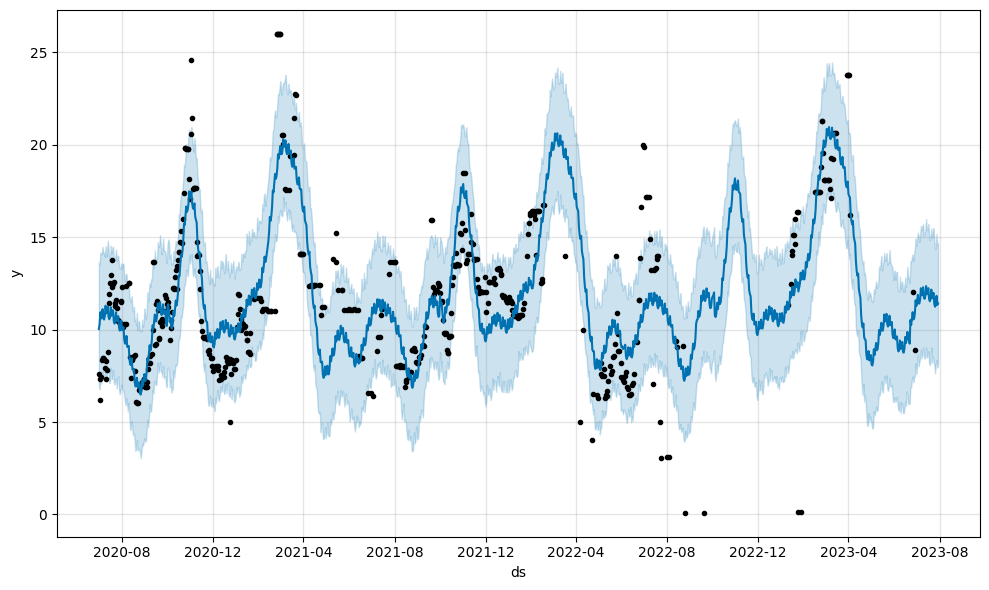

In [11]:
fig1 = model.plot(forecast)
fig1.savefig('七彩椒(1)进价预测模型.png')

In [12]:
#统计异常值（无法交给时间序列模型处理）
num = cost_by_date.count()
abnormal = num[num <= 1].index
abnormal_temp = cost_by_date[abnormal].fillna(0).sum()
abnormal_temp

单品名称
水果辣椒(橙色)     20.00
洪山菜薹珍品手提袋    73.50
活体银耳          3.00
甘蓝叶           2.00
芜湖青椒(2)       0.33
芝麻苋菜          4.21
芥兰            3.99
金针菇(份)        0.10
dtype: float64

In [13]:
from prophet import Prophet
import datetime

cost_price_pred = pd.DataFrame()
ds = ['2023-07-01','2023-07-02','2023-07-03','2023-07-04','2023-07-05','2023-07-06','2023-07-07']
cost_price_pred.index = ds

name = product_info['单品名称']
for i in range(len(name)):
    if name[i] not in abnormal:
        temp = pd.DataFrame()
        temp['ds'] = cost_by_date.index
        temp['y'] = cost_by_date[name[i]].values
        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
        model.add_country_holidays(country_name="CN")
        model.fit(temp)
        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        pred = forecast[['ds', 'yhat']]
        pred = pred[(pred['ds'] >= datetime.datetime.strptime('2023-07-01','%Y-%m-%d')) & (pred['ds'] <= datetime.datetime.strptime('2023-07-07','%Y-%m-%d'))]
        cost_price_pred[name[i]] = pred['yhat'].values
    else:
        y = [abnormal_temp[name[i]].mean() for j in range(len(ds))]
        cost_price_pred[name[i]] = y
cost_price_pred

23:21:04 - cmdstanpy - INFO - Chain [1] start processing
23:21:04 - cmdstanpy - INFO - Chain [1] done processing
23:21:04 - cmdstanpy - INFO - Chain [1] start processing
23:21:04 - cmdstanpy - INFO - Chain [1] done processing
23:21:04 - cmdstanpy - INFO - Chain [1] start processing
23:21:05 - cmdstanpy - INFO - Chain [1] done processing
23:21:05 - cmdstanpy - INFO - Chain [1] start processing
23:21:05 - cmdstanpy - INFO - Chain [1] done processing
23:21:06 - cmdstanpy - INFO - Chain [1] start processing
23:21:06 - cmdstanpy - INFO - Chain [1] done processing
23:21:06 - cmdstanpy - INFO - Chain [1] start processing
23:21:06 - cmdstanpy - INFO - Chain [1] done processing
23:21:06 - cmdstanpy - INFO - Chain [1] start processing
23:21:07 - cmdstanpy - INFO - Chain [1] done processing
23:21:07 - cmdstanpy - INFO - Chain [1] start processing
23:21:07 - cmdstanpy - INFO - Chain [1] done processing
23:21:07 - cmdstanpy - INFO - Chain [1] start processing
23:21:07 - cmdstanpy - INFO - Chain [1]

,牛首生菜,四川红香椿,本地小毛白菜,白菜苔,苋菜,云南生菜,竹叶菜,小白菜,南瓜尖,上海青,...,金针菇(盒),白玉菇(2),蟹味菇(2),白玉菇(盒),蟹味菇(盒),海鲜菇(袋)(4),海鲜菇(包),海鲜菇(袋)(3),虫草花(盒)(2),和丰阳光海鲜菇(包)
2023-07-01,1.448477,35.644119,29.137254,98.901763,2.530459,4.892639,2.898994,5.983530,43.576610,4.448322,...,1.352606,8.691155,24.153104,130.510391,29.566215,0.888268,1.936013,1.496162,-62.129935,7.298744
2023-07-02,1.880874,30.395856,35.845260,104.514053,2.544778,4.982323,2.987697,6.244765,45.051066,4.577368,...,1.319728,6.766108,22.806089,127.955434,27.782988,0.911964,1.822380,1.541812,-56.915792,6.562844
2023-07-03,1.763940,26.745698,42.286777,106.798309,2.647760,4.952225,2.930380,6.273171,64.984331,4.558968,...,1.291699,5.053706,20.965126,124.102794,25.727493,0.922488,1.746402,1.556370,-60.025076,5.942389
2023-07-04,1.602353,24.497031,48.166988,106.965513,2.634653,4.932869,2.951019,6.361308,60.945646,4.559555,...,1.265136,3.686981,18.740941,119.263126,23.286856,0.929528,1.853917,1.595528,-72.154281,5.496616
2023-07-05,1.672932,19.977642,53.575718,104.217509,2.623836,4.958944,3.014048,6.472691,-0.397190,4.642817,...,1.333062,2.616608,16.083359,113.344135,20.569749,0.942847,1.801832,1.558280,-56.868545,5.160119
2023-07-06,1.411147,16.004951,57.749937,99.083778,2.652438,4.927594,2.986191,6.682856,-22.878058,4.736267,...,1.346646,1.649570,13.100342,106.475096,17.648687,0.978011,1.775230,1.531560,-41.600676,4.996288
2023-07-07,1.417266,12.673461,61.058542,91.547464,2.739473,4.672407,2.970324,6.831825,57.261695,4.667127,...,1.351109,0.866127,10.101691,99.442257,14.663956,0.974968,1.731853,1.537980,-55.890546,4.866015


In [24]:
#由于某些原因导致的异常预测，进行筛选分析,并不能直接用于2-2因为这只是异常值的子集
abnormal_list = []
for col in cost_price_pred.columns:
    if cost_price_pred[col].min() > 3*cost_by_date[col].max() or cost_price_pred[col].min() < 0 or cost_price_pred[col].max() < 0.5*cost_by_date[col].min():
        abnormal_list.append(col)
abnormal_list

['本地小毛白菜',
 '白菜苔',
 '南瓜尖',
 '牛首油菜',
 '茼蒿',
 '蔡甸藜蒿',
 '豌豆尖',
 '马齿苋',
 '本地菠菜',
 '黑油菜',
 '黄花菜',
 '快菜',
 '薄荷叶',
 '蒲公英',
 '丝瓜尖',
 '芥菜',
 '大芥兰',
 '面条菜',
 '荠菜',
 '马兰头',
 '洪山菜苔',
 '本地黄心油菜',
 '鲜粽子叶',
 '艾蒿',
 '奶白菜苗',
 '菊花油菜',
 '枝江红菜苔(份)',
 '茼蒿(份)',
 '小青菜(2)',
 '紫苏(份)',
 '白蒿',
 '鱼腥草',
 '槐花',
 '红薯尖(份)',
 '蔡甸藜蒿(份)',
 '红珊瑚(粗叶)',
 '红橡叶',
 '绿牛油',
 '保康高山大白菜',
 '小白菜(份)',
 '小青菜(份)',
 '奶白菜(份)',
 '鲜粽叶',
 '鲜粽叶(袋)(1)',
 '外地茼蒿(份)',
 '龙牙菜',
 '黄白菜(1)',
 '大白菜秧',
 '油菜苔',
 '鲜粽叶(袋)(2)',
 '鲜粽叶(袋)(3)',
 '紫白菜(2)',
 '藕',
 '净藕(2)',
 '荸荠(份)',
 '洪湖莲藕(脆藕)',
 '野藕(2)',
 '藕尖',
 '紫圆茄',
 '大龙茄子',
 '青茄子(2)',
 '圆茄子(1)',
 '辣妹子',
 '紫尖椒',
 '紫螺丝椒',
 '七彩椒(份)',
 '灯笼椒(份)',
 '红灯笼椒(份)',
 '芜湖青椒(份)',
 '青杭椒(份)',
 '红尖椒(份)',
 '红椒(份)',
 '青红尖椒组合装(份)',
 '金针菇(袋)(1)',
 '猴头菇',
 '黑牛肝菌',
 '海鲜菇(袋)(1)',
 '秀珍菇',
 '虫草花(盒)(1)',
 '黑皮鸡枞菌',
 '虫草花(袋)',
 '赤松茸',
 '牛排菇',
 '杏鲍菇(250克)',
 '赤松茸(盒)',
 '牛排菇(盒)',
 '猪肚菇(盒)',
 '黑牛肝菌(盒)',
 '黑皮鸡枞菌(盒)',
 '海鲜菇(份)',
 '杏鲍菇(份)',
 '双孢菇(份)',
 '西峡香菇(2)',
 '鲜木耳(2)',
 '海鲜菇(2)',
 '姬菇(2)',
 '西峡花菇(2)',
 '花菇(一人份)',
 '西峡香菇(份) ',
 '鹿茸菇(盒)',

In [36]:
#最终批发价格预测(2023.7.1-2023.7.7)
cost_price_pred_final = cost_price_pred.drop(abnormal_list, axis=1)
cost_price_pred_final.to_csv('Prophet单品批发价格预测.csv')

In [38]:
#得到6.24-6.30
cost_price_within7 = cost_by_date.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]
# 删除异常单品,仅仅一部分，还有更多异常单品
# cost_price_within7 = cost_price_within7.drop(abnormal_list, axis=1)

cost_price_within7.to_csv('6.24-6.30单品批发价格.csv')
cost_price_within7

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
日期,,,,,,,,,,,,,,,,,,,,,
2023-06-24,NaN,11.92,NaN,4.32,NaN,NaN,NaN,NaN,2.94,5.75,...,NaN,NaN,4.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,NaN,11.93,NaN,4.12,NaN,NaN,NaN,4.48,2.96,5.76,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26,12.05,11.92,NaN,4.08,NaN,NaN,NaN,4.48,2.79,5.76,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,NaN,12.53,NaN,4.08,NaN,NaN,NaN,2.66,2.80,5.74,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-28,NaN,12.84,NaN,4.08,NaN,NaN,NaN,NaN,2.86,NaN,...,NaN,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-29,8.92,12.13,NaN,4.08,NaN,NaN,NaN,NaN,2.86,5.68,...,NaN,NaN,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,4.09,NaN,NaN,NaN,NaN,2.84,NaN,...,NaN,NaN,4.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#处理下一步需要用到的批发价格表(过去三年7.1-7.7)
import datetime
cost_price_within21 = cost_by_date[((cost_by_date.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (cost_by_date.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((cost_by_date.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (cost_by_date.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((cost_by_date.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (cost_by_date.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
# 删除异常单品,仅仅一部分，还有更多异常单品
cost_price_within21 = cost_price_within21.drop(abnormal_list, axis=1)

cost_price_within21.to_csv('各年7.1-7.7单品批发价格.csv')
cost_price_within21

单品名称,七彩椒(1),七彩椒(2),上海青,上海青(份),东门口小白菜,云南油麦菜,云南油麦菜(份),云南生菜,云南生菜(份),余干椒,...,高瓜(1),高瓜(2),鱼腥草(份),鲜木耳(1),鲜木耳(份),鲜藕带(袋),鸡枞菌,黄心菜(1),黄心菜(2),黄白菜(2)
日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,7.58,NaN,7.03,NaN,NaN,3.44,NaN,6.72,NaN,NaN,...,5.65,NaN,NaN,NaN,NaN,NaN,NaN,3.97,NaN,4.63
2020-07-02,7.33,NaN,7.03,NaN,6.83,3.58,NaN,4.23,NaN,NaN,...,5.76,NaN,NaN,NaN,NaN,NaN,NaN,3.97,NaN,4.76
2020-07-03,6.21,NaN,6.76,NaN,6.88,3.75,NaN,4.61,NaN,NaN,...,5.61,NaN,NaN,NaN,NaN,NaN,NaN,3.98,NaN,4.74
2020-07-04,7.43,NaN,6.56,NaN,7.21,3.75,NaN,5.77,NaN,NaN,...,5.41,NaN,NaN,NaN,NaN,NaN,NaN,4.01,NaN,4.63
2020-07-05,8.35,NaN,6.56,NaN,7.03,3.75,NaN,5.77,NaN,NaN,...,5.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.75
2020-07-06,8.44,NaN,6.25,NaN,NaN,3.65,NaN,6.48,NaN,NaN,...,5.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.31
2020-07-07,8.46,NaN,6.25,NaN,4.32,3.73,NaN,6.92,NaN,NaN,...,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.31
2021-07-01,6.57,NaN,3.94,NaN,3.48,3.02,NaN,4.90,NaN,NaN,...,4.15,NaN,NaN,NaN,NaN,NaN,NaN,3.87,NaN,3.62
2021-07-02,NaN,NaN,3.93,NaN,3.66,3.04,NaN,4.91,NaN,NaN,...,4.14,NaN,NaN,7.44,NaN,NaN,NaN,3.87,NaN,3.60


In [33]:
cost_by_date.drop(abnormal_list, axis=1).to_csv('按单品每天批发价格.csv')